In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 


In [2]:
logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-rom-fadeev/3_logs.csv', encoding='windows-1251', sep=',')
user_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-rom-fadeev/3_user_data.csv', encoding='windows-1251', sep=',')

In [3]:
logs.shape

(4500, 4)

In [4]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [5]:
user_data.shape

(2954, 3)

In [6]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [7]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [8]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [9]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [10]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [11]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [12]:
ddd = logs.query('success == True')\
    .groupby('client', as_index=False)\
    .agg({'success' : 'count'})\
    .sort_values('success', ascending=False)
    
    


In [13]:
ddd.head(10)

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41
1826,64064,40


In [14]:
ddd.max()

client     99993
success       41
dtype: int64

In [15]:
allMax= ddd.query('success >= 41')\
    .groupby('client', as_index=False)\
    .agg({'success' : 'count'})\
    .sort_values('success', ascending=True)

In [16]:
allMax

,client,success
0,12179,1
1,28719,1
2,36165,1
3,52870,1
4,61468,1
5,61473,1
6,78349,1
7,82563,1
8,92584,1


In [17]:
list_ui = allMax_tolist = allMax['client'].tolist()


In [18]:
list_ui

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [19]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [20]:
fulsucc= logs.query('success == True')\
    .groupby('platform', as_index=False)\
    .agg({'success' : 'count'})\
    .sort_values('success', ascending=True)

In [21]:
fulsucc

,platform,success
2,tablet,180
0,computer,1090
1,phone,2019


In [22]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [23]:
alldf = user_data.merge(logs, on='client', how='inner')

In [24]:
alldf

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [75]:
compT = alldf.groupby('age', as_index=False)\
             .agg({'success' : 'sum'})\
#             .value_counts()
            

In [86]:
plt.figure(figsize=(12,8))
sns.countplot(alldf.query(['platform == "computer"']).age)

ValueError: expr must be a string to be evaluated, <class 'list'> given

<Figure size 864x576 with 0 Axes>

In [31]:
succ = alldf.query('success == True')\
            .groupby('client', as_index=False)\
            .agg({'success' : 'sum'})\
               

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


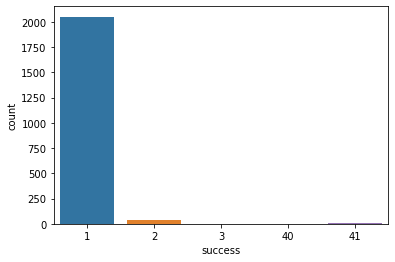

In [34]:
sns.distplot(succ.success)
# sns.countplot(succ.success) - в countplot лучше видно count

In [28]:
premplatf= alldf.query('premium == True')\
               .groupby('platform', as_index=False)\
               .agg({'client' : 'count'})\
               .sort_values('platform', ascending=False)

In [29]:
premplatf

,platform,client
2,tablet,24
1,phone,246
0,computer,150


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


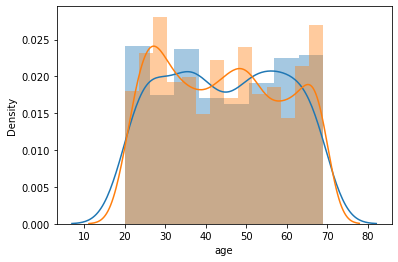

In [30]:
sns.distplot(alldf.query('premium == True').age)
sns.distplot(alldf.query('premium == False').age)